In [10]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵


In [11]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6) # 输入数据x的特征是8维，x有8个特征
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        return x



In [12]:
model = Model()


In [13]:
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
 
epoch_list = []
loss_list = []
# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
 
    optimizer.zero_grad()
    loss.backward()
 
    optimizer.step()


0 0.6834295392036438
1 0.6797559857368469
2 0.6763525605201721
3 0.6732586026191711
4 0.6705331206321716
5 0.6681758761405945
6 0.6661040186882019
7 0.6642565727233887
8 0.6625963449478149
9 0.6610974669456482
10 0.6597397327423096
11 0.6585071086883545
12 0.6573862433433533
13 0.6563655734062195
14 0.6554350256919861
15 0.6545859575271606
16 0.6538105010986328
17 0.6531017422676086
18 0.6524533629417419
19 0.651859700679779
20 0.6513159275054932
21 0.650817334651947
22 0.6503599286079407
23 0.6499401926994324
24 0.6495547890663147
25 0.6492006778717041
26 0.6488752365112305
27 0.6485761404037476
28 0.6483010649681091
29 0.6480481028556824
30 0.6478153467178345
31 0.6476011872291565
32 0.6474040150642395
33 0.6472225189208984
34 0.6470553278923035
35 0.6469012498855591
36 0.6467592120170593
37 0.646628201007843
38 0.6465073227882385
39 0.646395742893219
40 0.6462926268577576
41 0.6461973786354065
42 0.6461092829704285
43 0.6460277438163757
44 0.6459522843360901
45 0.645882248878479
46 

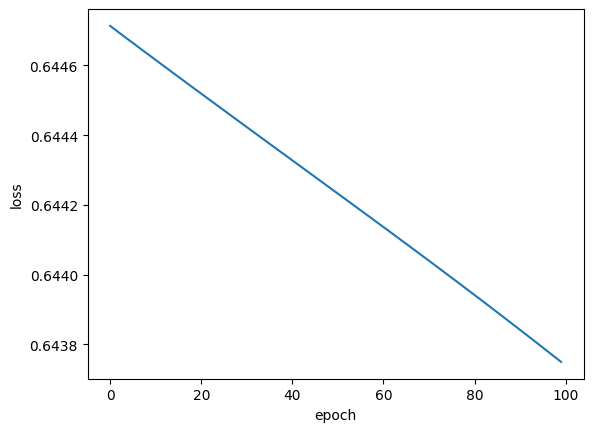

In [15]:
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()